In [1]:
#ライブラリのインストール
!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1

In [2]:
#ライブラリのインポート
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import torch
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot

In [3]:
#データの準備
data = pd.read_csv('concrete_data.csv')

In [4]:
#データの中身確認
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
#要素数を確認
print(data.shape)
#1031行、9列
#print(data.type)エラー発生

(1030, 9)


In [6]:
#今回は単回帰
#必要な変数を抜き出す(2値)
#説明変数cement、目的変数strength
x_pre = np.hstack([data.values[1:,0]])#np.hstackで水平方向に配列を作成する
y_pre = np.hstack([data.values[1:,8]])
name_pre = np.hstack([data.values[0,:]])
feature_names = np.array(['cement','blast_furnace_slat','fly_ash','water','superplasticizer','coares_aggregate','fine_aggregate','age','cocrete_compressive_strength'])
#x = x_pre[:,feature_names == 'cement']
#y = data[:,feateure_names == 'concrete_compressive_strength']

In [7]:
print(x_pre)
print(y_pre)
print(name_pre)
#配列が作成できているか確認
print(x_pre.dtype)
print(type(x_pre))

[540.  332.5 332.5 ... 148.5 159.1 260.9]
[61.89 40.27 41.05 ... 23.7  32.77 32.4 ]
[ 540.      0.      0.    162.      2.5  1040.    676.     28.     79.99]
float64
<class 'numpy.ndarray'>


In [8]:
print(x_pre.shape)
#要素数を確認
#1030行、0列

(1029,)


In [9]:
#このままでは入力に適さないので形を変換:xデータ作成
x = x_pre.reshape(-1,1)
#y = y_pre.reshape(-1,1)
y = y_pre

print(x)
print(x.shape)
print(x.dtype)

[[540. ]
 [332.5]
 [332.5]
 ...
 [148.5]
 [159.1]
 [260.9]]
(1029, 1)
float64


In [10]:
#x,yをfloatに変換
x2 = x.astype(float)
y2 = y.astype(float)
print(x2.dtype)
print(y2.dtype)

float64
float64


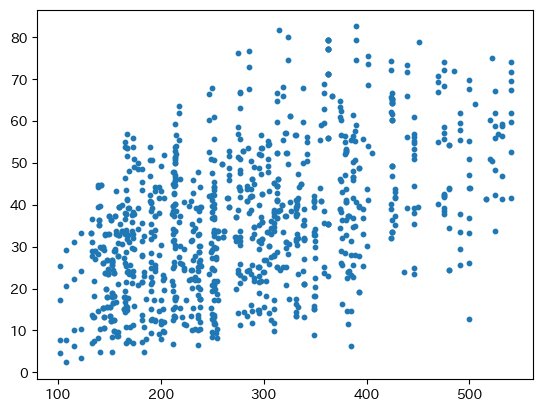

In [11]:
#散布図の表示
plt.scatter(x_pre,y_pre,s=10)
#汚いグラフ、処理が適切でない？

In [12]:
#変数定義
#入力次元数定義
n_input = x.shape[1]
#出力次元数
n_output = 1

print(f'入力:{n_input} 出力:{n_output}')

入力:1 出力:1


In [44]:
#機械学習モデルのクラスを定義

class Net(nn.Module):
  def __init__(self,n_input,n_output):
    #親クラスnn.Moduleの初期化呼び出し
    super().__init__()
    #出力層の定義
    self.l1 = nn.Linear(n_input,n_output)
    #パラメータ調整、初期値を全て1に
    nn.init.constant_(self.l1.weight,0.00001)
    nn.init.constant_(self.l1.bias,10.0)

    #予測関数の定義
  def forward(self,x):
      x1 = self.l1(x)
      return x1

In [45]:
#インスタンス生成
net = Net(n_input,n_output)

In [15]:
print(net)

Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)


In [46]:
#損失関数と最適化関数の定義

#損失関数のインスタンス生成:平均2乗誤差
creterion = nn.MSELoss()
#学習率
lr = 0.0001
#最適化関数:勾配降下法
optimizer = optim.SGD(net.parameters(),lr = lr)

In [36]:
#入力値のテンソル変数化
inputs = torch.tensor(x).float()
labels = torch.tensor(y).float()

#次元数確認
print(inputs.shape)
print(labels.shape)
print(inputs.type)
print(labels.type)

torch.Size([1029, 1])
torch.Size([1029])
<built-in method type of Tensor object at 0x7dd33b57b880>
<built-in method type of Tensor object at 0x7dd33b57b920>


In [18]:
#損失計算用にlabels変数を(N,1)次元の行列に変換する
#labels1 = labels.view((-1,1))
#次元数確認
#print(labels1.shape)

#既にreshapeしているのでここは不要と判断

In [47]:
#予測値計算
outputs = net(inputs)

In [48]:
#損失計算
loss = creterion(outputs,labels)
#損失取得
print(f'{loss.item():.5f}')

941.39136


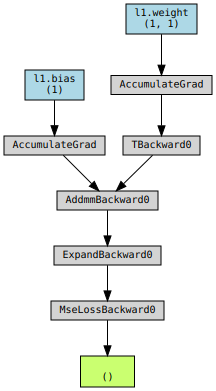

In [21]:
g = make_dot(loss,params=dict(net.named_parameters()))
display(g)

In [49]:
#勾配計算
loss.backward()
print(net.l1.weight.grad)
print(net.l1.bias.grad)

tensor([[-14479.4561]])
tensor([-51.5444])


In [50]:
#パラメータ修正
optimizer.step()
print(net.l1.weight)
print(net.l1.bias)

Parameter containing:
tensor([[1.4480]], requires_grad=True)
Parameter containing:
tensor([10.0052], requires_grad=True)


In [51]:
#勾配の初期化
optimizer.zero_grad()
#確認
print(net.l1.weight.grad)
print(net.l1.bias.grad)

None
None


In [25]:
torch.cuda.is_available()

False

In [52]:
#繰り返し計算

#学習率
lr = 0.00001

#インスタンス生成（パラメータ初期化)
net = Net(n_input,n_output)

#損失関数
criterion = nn.MSELoss()

#最適化関数
optimizer = optim.SGD(net.parameters(),lr=lr)

#繰り返し回数
num_epochs = 30000

#評価結果記録（損失のみ）
history = np.zeros((0,2))

#device = "cuda:0" if torch.cuda.is_avalable() else "cpu"

#繰り返し計算ループ

for epoch in range(num_epochs):
  #勾配初期化
  optimizer.zero_grad()
  #予備計算
  outputs = net(inputs)
  #損失計算
  loss = criterion(outputs,labels)
  #勾配計算
  loss.backward()
  #パラメータ修正
  optimizer.step()
  if (epoch % 100 == 0):
    history = np.vstack((history,np.array([epoch,loss.item()])))
    print("loss:", loss.item())





loss: 941.391357421875
loss: 357.4871826171875
loss: 357.4485168457031
loss: 357.409912109375
loss: 357.3713073730469
loss: 357.3326721191406
loss: 357.2940979003906
loss: 357.2555236816406
loss: 357.2169189453125
loss: 357.1783752441406
loss: 357.13983154296875
loss: 357.10125732421875
loss: 357.0627136230469
loss: 357.024169921875
loss: 356.98565673828125
loss: 356.9471740722656
loss: 356.90869140625
loss: 356.87017822265625
loss: 356.8316955566406
loss: 356.793212890625
loss: 356.7547607421875
loss: 356.71630859375
loss: 356.6778564453125
loss: 356.6394348144531
loss: 356.6009826660156
loss: 356.5625915527344
loss: 356.5242004394531
loss: 356.4857177734375
loss: 356.4473876953125
loss: 356.4090576171875
loss: 356.37066650390625
loss: 356.332275390625
loss: 356.2939147949219
loss: 356.255615234375
loss: 356.2172546386719
loss: 356.17889404296875
loss: 356.1405944824219
loss: 356.102294921875
loss: 356.0639953613281
loss: 356.0257568359375
loss: 355.9873962402344
loss: 355.94918823242

In [ ]:
net.l1.weight#確認

In [ ]:
net.l1.bias#確認

In [53]:
# 損失初期値と最終値

print(f'損失初期値: {history[0,1]:.5f}')
print(f'損失最終値: {history[-1,1]:.5f}')

損失初期値: 941.39136
損失最終値: 346.70856


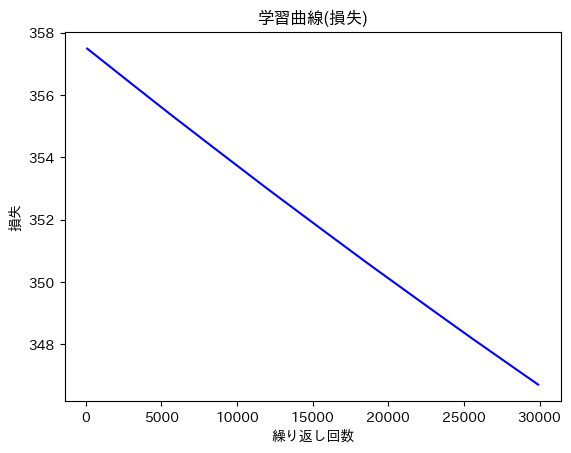

In [54]:

# 学習曲線の表示 (損失)
# 最初の1つを除く

plt.plot(history[1:,0], history[1:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()

#いくらやってもすとーーんとしか下がらない
#方法を変える必要あり。だけどこれはここまでとする

In [55]:
# 回帰直線の算出

# xの最小値、最大値
xse = np.array((x.min(), x.max())).reshape(-1,1)
Xse = torch.tensor(xse).float()

with torch.no_grad():
  Yse = net(Xse)

print(Yse.numpy())

[[19.455194]
 [52.310562]]


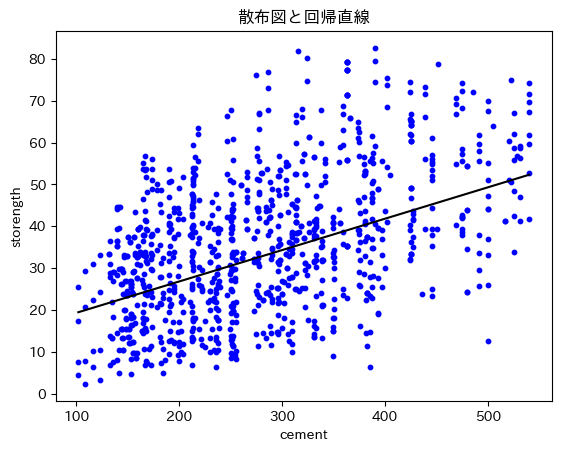

In [56]:
# 散布図と回帰直線の描画

plt.scatter(x, y, s=10, c='b')
plt.xlabel('cement')
plt.ylabel('storength')
plt.plot(Xse.data, Yse.data, c='k')
plt.title('散布図と回帰直線')
plt.show()